In [79]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
challenge_HK = pd.read_csv('challenge.csv')
run_HK = pd.read_csv('run.csv')
challenge_HK.head()

,Overall Position,Gender Position,Category Position,Category,Race No,Country,Official Time,Net Time,10km Time,Half Way Time,30km Time
0,1,1,1,MMS,21080,Kenya,2:12:12,2:12:11,0:30:35,1:04:48,1:33:36
1,2,2,1,MMI,14,Kenya,2:12:14,2:12:13,0:30:34,1:04:48,1:33:36
2,3,3,2,MMI,2,Ethiopia,2:12:20,2:12:18,0:30:35,1:04:49,1:33:36
3,4,4,2,MMS,21077,Kenya,2:12:29,2:12:27,0:30:35,1:04:48,1:33:36
4,5,5,3,MMI,18,Ethiopia,2:12:47,2:12:46,0:30:34,1:04:48,1:33:36


In [81]:
run_HK.head()

,Overall Position,Gender Position,Category Position,Category,Race No,Country,Official Time,Net Time,10km Time,Half Way Time,30km Time
0,1,1,1,MR1,A0066,Ireland,2:51:05,2:51:02,0:38:50,1:23:15,1:59:44
1,2,2,2,MR1,A6190,Hong Kong SAR,2:54:04,2:53:57,0:39:35,1:24:09,2:00:24
2,3,3,3,MR1,A4491,China,2:58:34,2:57:28,0:40:53,1:27:03,2:04:02
3,4,4,4,MR1,A8955,China,3:03:34,3:03:28,0:42:52,1:30:34,2:08:36
4,5,5,5,MR1,A5879,China,3:04:50,3:04:49,0:40:42,1:27:31,2:06:08


In [82]:
print(challenge_HK['10km Time'])

0       0:30:35
1       0:30:34
2       0:30:35
3       0:30:35
4       0:30:34
         ...   
5611    1:14:27
5612    1:18:44
5613    1:24:31
5614    1:26:10
5615    1:24:25
Name: 10km Time, Length: 5616, dtype: object


In [83]:
def get_gender(a):
    return a[1]
def get_class(a):
    return a[2:]
def get_time(x):
    if x=='':
        return None
    elif x=='nan':
        return None
    else:
        return (dt.datetime.strptime(str(x),"%H:%M:%S")-dt.datetime.strptime('00:00:00',"%H:%M:%S")).total_seconds()/60

In [84]:
challenge_HK['gender'] = challenge_HK['Category'].apply(get_gender)

In [85]:
challenge_HK['gender']

0       M
1       M
2       M
3       M
4       M
       ..
5611    M
5612    M
5613    F
5614    F
5615    F
Name: gender, Length: 5616, dtype: object

In [86]:
run_HK['gender'] = run_HK['Category'].apply(get_gender)

In [87]:
run_HK['gender']

0       R
1       R
2       R
3       R
4       R
       ..
7228    R
7229    R
7230    R
7231    R
7232    R
Name: gender, Length: 7233, dtype: object

In [88]:
challenge_HK['gender']=challenge_HK['Category'].apply(get_gender)
challenge_HK['class']=challenge_HK['Category'].apply(get_class)
run_HK['class']=run_HK['Category'].apply(get_class)
challenge_HK['Official Time']=challenge_HK['Official Time'].apply(get_time)
run_HK['Official Time']=run_HK['Official Time'].apply(get_time)
challenge_HK['Net Time']=challenge_HK['Net Time'].apply(get_time)
run_HK['Net Time']=run_HK['Net Time'].apply(get_time)

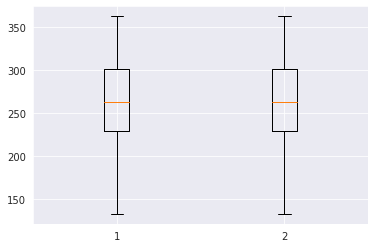

In [89]:
with sns.axes_style('darkgrid'):
    plt.boxplot([challenge_HK[challenge_HK['gender']=='M']['Official Time'],
                 challenge_HK[challenge_HK['gender']=='M']['Official Time']])

In [90]:
grouped=challenge_HK[['gender','Official Time']].groupby('gender',group_keys=True).apply(lambda x: x)

In [91]:
grouped

,gender,Official Time
0,M,132.200000
1,M,132.233333
2,M,132.333333
3,M,132.483333
4,M,132.783333
...,...,...
5611,M,362.883333
5612,M,362.966667
5613,F,363.833333
5614,F,364.933333
